In [51]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

TICKER = "SPY"
WINDOW = 200
MACD_FAST = 12
MACD_SLOW = 27
MACD_SPAN = 9
LOOKBACK = 40



/var/folders/ln/kls56lq93mq4z_459sxk1vbh0000gn/T/ipykernel_57411/39101519.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume  \
Date                                                                   
2025-04-30  552.905457  554.879662  539.923875  545.956030  93101500   
2025-05-01  556.823853  562.407383  556.215665  558.718277  63186100   
2025-05-02  565.089417  566.704636  560.722322  563.065371  60717300   
2025-05-05  561.848999  564.979758  560.044337  560.911767  38659200   
2025-05-06  557.152893  561.689470  555.318351  556.285462  48264700   

Price           12_ema      27_ema      MACD    Signal  
Date                                                    
2025-04-30  552.905457  552.905457  0.000000  0.000000  
2025-05-01  555.027921  554.937217  0.090704  0.050391  
2025-05-02  558.954925  558.574934  0.379991  0.185473  
2025-05-05  559.868471  559.486556  0.381915  0.252018  
2025-05-06  559.130658  558.948218  0.182440  0.231320  


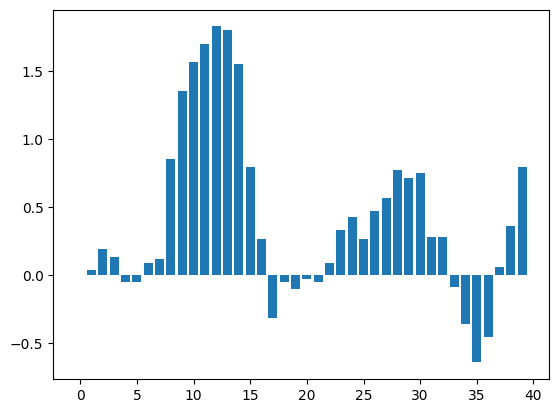

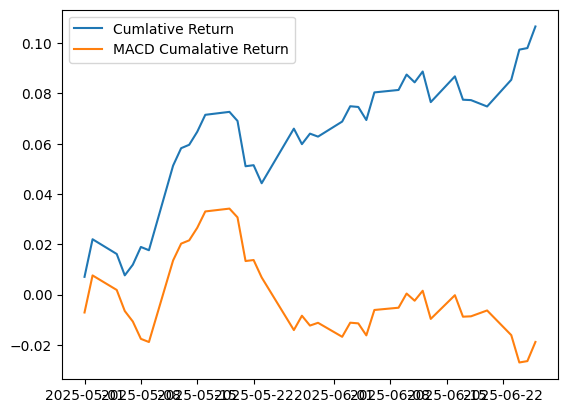

In [52]:
def get_data(ticker=TICKER, lookback=LOOKBACK):
  df = yf.download(ticker)
  df.columns = df.columns.get_level_values(0)

  return df.iloc[-lookback:, :]

def add_macd(df, fast=MACD_FAST, slow=MACD_SLOW, span=MACD_SPAN):

    df[f"{fast}_ema"] = df["Close"].ewm(span=fast).mean()
    df[f"{slow}_ema"] = df["Close"].ewm(span=slow).mean()

    df["MACD"] = df[f"{fast}_ema"] - df[f"{slow}_ema"]

    df["Signal"] = df["MACD"].ewm(span=span).mean()
    print(df.head())

    df["MACD_hist"] = df["MACD"] - df["Signal"]

    plt.bar(x=range(len(df)), height=df["MACD_hist"])
    return df

def add_strategy(df):
    df["Strategy"] = np.where(df["MACD_hist"] > 0, 1, -1)
    df["Strategy"] = df["Strategy"].shift(1)
    return df

def test_strategy(df):
    df["Cumalative Return"] = np.cumprod(1 + df["Close"].pct_change()) - 1
    df["MACD Cumalative Return"] = np.cumprod(1 + df["Close"].pct_change() * df["Strategy"]) - 1

    plt.figure()
    plt.plot(df["Cumalative Return"])
    plt.plot(df["MACD Cumalative Return"])
    plt.legend([f"Cumlative Return", f"MACD Cumalative Return"])
    return df


df = get_data()
df = add_macd(df)
df = add_strategy(df)
df = test_strategy(df)